In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

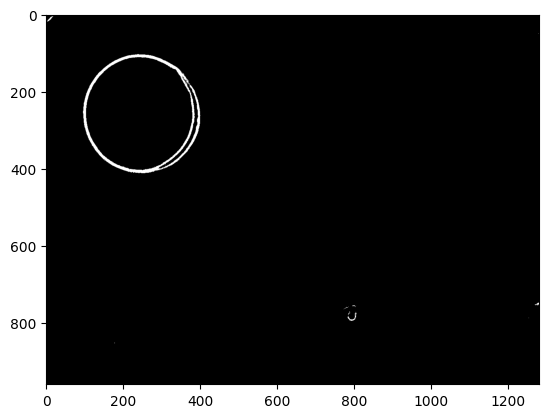

In [13]:
path = "E:\\Year4_Sec1\\Image_Pro\\final_exam\\data\\data_02_12\\Image00005.JPG"

img = cv2.imread(path)
img = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,27,4)
plt.imshow(img,cmap = "gray")
plt.show()

Do not dectect the Circle
The rectangle dectected: Center = (528.00, 377.00), Side = 297.97


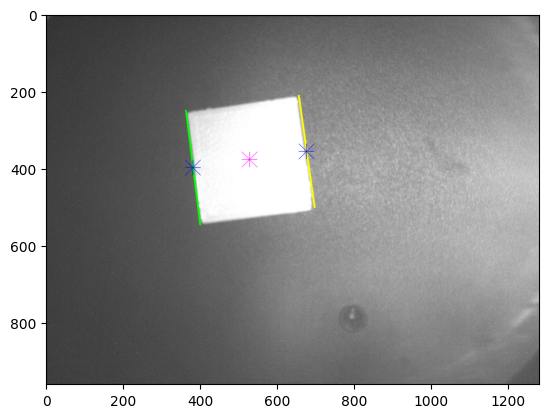

In [22]:
#https://www.geeksforgeeks.org/line-detection-python-opencv-houghline-method/
import cv2
import numpy as np
import matplotlib.pyplot as plt
path = "E:\\Year4_Sec1\\Image_Pro\\final_exam\\data\\data_02_12\\Image00024.JPG"
image = cv2.imread(path)
img = cv2.fastNlMeansDenoisingColored(image,None,10,10,7,21) #lọc nhiễu ảnh
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)	#chuyển sang ảnh xám
img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,27,4) 
#to detect coutour of image using gaussian filter. Adjust 2 last params to match your image

# Apply HoughLinesP method to
# to directly obtain line end points
lines = cv2.HoughLinesP(
			img, # Input edge image
			1, # Distance resolution in pixels
			np.pi/180, # Angle resolution in radians
			threshold=100, # Min number of votes for valid line
			minLineLength=100, # Min allowed length of line
			maxLineGap=2 # Max allowed gap between line for joining them
			)
rows = img.shape[0]
# Apply HoughCircles method to
# to directly obtain line end points
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, rows / 8,
							param1=200, param2=30,
							minRadius=1, maxRadius=1000)

center_shape=[] #mảng lưu tâm tất cả shape 
#CIRCLE
if circles is not None:
	circles = np.uint16(np.around(circles))
	for i in circles[0, :]:
		center = (i[0], i[1])
		# circle center
		cv2.circle(image, center, 5, (0, 100, 100), 3)
		# circle outline
		radius = i[2]
		#print(radius)
		cv2.circle(image, center, radius, (255, 0, 255), 3)
		print("The Circle Dectected: Center = (%2.2f, %2.2f), Radius = %2.2f"%(i[0], i[1], i[2]))
		center_shape.append([center])
else:
	print("Do not dectect the Circle")
	center_shape.append([None])

#RECTANGLE
if lines is not None:
	d=[] # chưa độ dài các cạnh được dectect
	for i, points  in enumerate(lines):
		x1,y1,x2,y2=points[0]
		d.append([i,np.sqrt(pow((x2-x1),2)+pow((y2-y1),2))])
	d = np.array(d)
	d_=np.flip(np.argsort(d[:,1],kind='mergesort')) #sort từ lớn đến bé

	lines_list =[] #mảng lưu tọa độ đoạn thẳng
	cent_list = [] #mảng lưu trung điểm đoạn thẳng
	for stt, i in enumerate(d_): #Lọc 2 cạnh đối nhau của hình vuông
		x1,y1,x2,y2=lines[i][0] #lấy tọa độ cạnh
		#tìm trung điểm cạnh
		x_av = int(np.floor(abs(abs(x1+x2))/2))
		y_av = int(np.floor(abs(abs(y1+y2))/2))
		if stt == 0: #lưu cạnh độ dài lớn nhất 
			d_1_x = x_av
			d_1_y = y_av
			cv2.line(image,(x1,y1),(x2,y2),(0,255,0),3)
			cv2.drawMarker(image, (x_av, y_av),(0,0,255), markerType=cv2.MARKER_STAR, markerSize=40, thickness=1, line_type=cv2.LINE_AA)
			# Maintain a simples lookup list for points
			lines_list.append([(x1,y1),(x2,y2)])
			cent_list.append([d_1_x,d_1_y])
		d_break = np.sqrt(pow((d_1_x-x_av),2)+pow((d_1_y-y_av),2))
		
		if d_break > 250 and d_break < 350:	#tìm cạnh đối
			cv2.line(image,(x1,y1),(x2,y2),(255,255,0),3)
			cv2.drawMarker(image, (x_av, y_av),(0,0,255), markerType=cv2.MARKER_STAR, markerSize=40, thickness=1, line_type=cv2.LINE_AA)
			# Maintain a simples lookup list for points
			lines_list.append([(x1,y1),(x2,y2)])
			cent_list.append([x_av,y_av])
			break
	#print(len(lines_list),d)
	x_cen = int(np.floor(abs(abs(cent_list[0][0]+cent_list[1][0]))/2))
	y_cen = int(np.floor(abs(abs(cent_list[0][1]+cent_list[1][1]))/2))
	cv2.drawMarker(image, (x_cen, y_cen),(255,0,255), markerType=cv2.MARKER_STAR, markerSize=40, thickness=1, line_type=cv2.LINE_AA)
	print("The rectangle dectected: Center = (%2.2f, %2.2f), Side = %2.2f"%(x_cen, y_cen, d_break))
	center_shape.append([x_cen,y_cen])
else:
	print("Do not dectect the Rectangle")
	center_shape.append([None])
plt.imshow(image)
plt.show()


In [23]:
center_shape #Tâm đường tròn, tâm hình vuông

[[None], [528, 377]]